# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 8 Координатные оси Axis

### Содержание главы

1. Контейнер Axis;

2. Главные и вспомогательные деления;

3. Настройка координатной оси.

Данные, насённые тем или иным графическим способомна рисунок Figure и область рисования Axes, не представляют особого интереса для научного анализа, пока они не привязаны к какой-либо системе координат. При создании экземпляра axes на вновь созданной области рисования автоматически задаётся прямоугольная система координат, если не указаны атрибуты polar или projection. Подробнее про области рисования с другими системами координат смотри главу "Графики в полярных координатах".

Система координат определяет вид координатных осей. По умолчанию задаётся прямоугольная система координат: ось абсцисс (ось "OX") и ось ординат (ось "OY"). В полярной системе координат координатными осями являются радиус и угол наклона, что выражается в виде своеобразного тригонометрического круга.

Для хранения и форматирования каждой координатной оси и существует контейнер Axis.

### Электронные ресурсы:

+ [Описание элементов рисунка в matplotlib](http://matplotlib.org/users/artists.html);

### 8.1 Контейнер Axis

Axis (не путать с областями рисования Axes) - это третья "матрёшка" (после Figure и Axes) или контейнер в matplotlib, которая привязана к области рисования Axes и на которой располагаются деления осей (ticks), подписи делений (tick labels) и подписи осей (axis labels).

Координатные оси являются экземплярами класса matplotlib.axis.Axis.

Любая область рисования Axes содержит два особых Artist-контейнера: XAxis и YAxis. Они отвечают за отрисовку делений (ticks) и подписей (labels) координатных осей, которые хранятся как экземпляры в переменных xaxis и yaxis. Чтобы обратиться к экземпляру axis, отвечающему за ось ординат, нужно обратиться к контейнеру yaxis соответствующей области рисования ax. Причём запись "`yax=ax.get_yaxis()`" идентична записи "`yax=ax.yaxis`".

Каждый экземпляр axis содержит атрибут подписей (label) координатной оси и список главных (major ticks) и вспомогательных (minor ticks) делений, а также является хранилищем для экземпляров делений (ticks). Деления - это экземпляры класса `matplotlib.axis.Tick`, которые визуализируют деления (их размер, цвет, толщину и т.д.) и подписи к ним. Деления создаются динамически исходя из области изменения переданных данных. В результате на координатной оси появляются и хранятся экземпляры классов `matplotlib.axis.XTick` и `matplotlib.axis.YTick`. Они родственны классу `matplotlib.axis.Tick`. Хотя все графические примитивы, с помощью которых создаётся облик координатной оси содержатся в делениях ticks, о которых будет показано в следующей главе, у экземпляров axis есть средства для управления линиями делений (tick lines), подписями делений (tick labels), а также местоположением делений (tick locations).

('Major X-ticks locations:', array([   0.,   20.,   40.,   60.,   80.,  100.]))
('Major X-ticks labels:', <a list of 6 Text major ticklabel objects>)
('Major X-ticks tick lines:', <a list of 12 Line2D ticklines objects>)


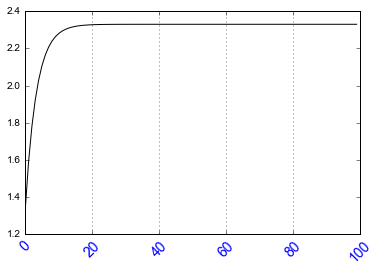

In [3]:
# Пример 8.1.1

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax = fig.add_subplot(111)

x = np.arange(100)
y = -np.exp(-0.3*x) + 2.33

ax.plot(x, y, 'k')

xax = ax.xaxis   # или xax = ax.get_xaxis()

xlocs = xax.get_ticklocs()
print ('Major X-ticks locations:', xlocs)
xlabels = xax.get_ticklabels()
print ('Major X-ticks labels:', xlabels)
xlines = xax.get_ticklines()
print ('Major X-ticks tick lines:', xlines)

# Линии вспомогательной сетки (главные деления) только по оси абсцисс
xax.grid(True)

for label in xlabels:
    # цвет подписи деленений оси OX
    label.set_color('blue')
    # поворот подписей деленений оси OX 
    label.set_rotation(45)
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(14)

save('pic_8_1_1', fmt='png')
save('pic_8_1_1', fmt='pdf')
    
plt.show()

### 8.2 Главные и вспомогательные деления

В matplotlib деления на координатной оси могут быть главными (major ticks) или вспомогательными (minor ticks). По умолчанию наносятся главные деления, к ним привязывается нанесение вспомогательной сетки grid, за которую отвечает параметр axes.grid.which': u'major' из rcParams. Работа со вспомогательными делениями ничем не отличается от работы с главными делениями: используются те же методы, но явно указывается тип делений через определённый атрибут. Обычно этот атрибут называется which (принимает значения 'major'/'minor') или булевый атрибут minor.

Ниже представлен список некоторых методов Axis. Они применяются к экземплярам xaxis или yaxis. Так как при работе с атрибутами поддерживается идеология "set-get", то списке указаны методы только с приставкой "set_". Для получения значений атрибутов какой-либо характеристики, нужно в методе заменить приставку "set" на "get": set_scale -> get_scale; get_data_interval -> set_data_interval и так далее.

----------------------------------------------------------

Вспомогательный метод -> Описание

----------------------------------------------------------

+ **set_scale** -> определяет характер изменений значений на оси: линейный 'linear' (по умолчанию) или 'log' логарифмический;

+ **set_view_interval** -> экземпляр интервала области изменения отображений по оси axis;

+ **set_data_interval** -> экземпляр интервала области изменения данных по оси axis;

+ **set_gridlines** -> список линий сетки для Axis;

+ **set_label** -> подпись оси, экземпляр Text;

+ **set_ticklabels** -> подписи делений, список экземпляров Text. Тип делений определяет параметр minor=True/False;

+ **set_ticklines** -> конфигурация делений, список экземпляров Line2D. Тип делений определяет параметр minor=True/False;

+ **set_ticklocs** -> положение делений. Тип делений определяет параметр minor=True/False;

+ **set_major_locator** -> экземпляр matplotlib.ticker.Locator для главных (major) делений;

+ **set_major_formatter** -> экземпляр matplotlib.ticker.Formatter для главных делений;

+ **set_major_ticks** -> список экземпляров Tick для главных делений;

+ **set_minor_locator** -> экземпляр matplotlib.ticker.Locator для вспомгательных (minor) делений;

+ **set_minor_formatter** -> экземпляр matplotlib.ticker.Formatter для вспомогательных делений;

+ **set_minor_ticks** -> список экземпляров Tick для вспомогательных делений;

+ **grid** -> определяет будет ли отображаться линии сетки для главной или вспомогательных делений (параметр which='major'/'minor');

----------------------------------------------------------


('Major X-ticks tick lines:', <a list of 12 Line2D ticklines objects>)
('Major X-ticks location:', array([   0.,   20.,   40.,   60.,   80.,  100.]))
('Major X-ticks labels:', <a list of 6 Text major ticklabel objects>)
('Major X-ticks tick lines:', <a list of 0 Line2D ticklines objects>)
('Minor X-ticks location:', [])
('Minor X-ticks labels:', <a list of 0 Text minor ticklabel objects>)
----------------------------
Тип изменения оси: linear
Область изменения отображения данных: [   0.  100.]
Область изменения отображения данных: [  0.  99.]
Линии сетки: <a list of 6 Line2D gridline objects>
Подпись оси: Text(0.5,0,u'')
Подписи делений: <a list of 6 Text major ticklabel objects>
Линии делений: <a list of 12 Line2D ticklines objects>
Расположение делений: [   0.   20.   40.   60.   80.  100.]
locator главных делений: <matplotlib.ticker.AutoLocator object at 0x00000000083C4B00>
formatter главных делений: <matplotlib.ticker.ScalarFormatter object at 0x000000000847D978>
Список главных дел

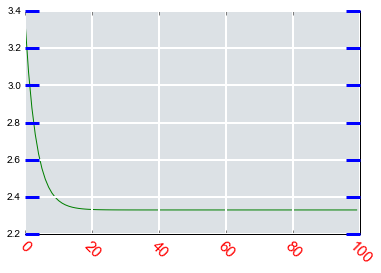

In [4]:
# Пример 8.2

fig = plt.figure()

ax = fig.add_subplot(111)
rect = ax.patch
rect.set_facecolor('lightslategray')
rect.set_alpha(0.25)

x = np.arange(100)
y = np.exp(-0.3*x) + 2.33

ax.plot(x, y, 'green')

xax = ax.xaxis   # экземпляр xaxis

print ('Major X-ticks tick lines:', xax.get_ticklines())
print ('Major X-ticks location:', xax.get_ticklocs())
print ('Major X-ticks labels:', xax.get_ticklabels())

print ('Major X-ticks tick lines:', xax.get_ticklines(minor=True))
print ('Minor X-ticks location:', xax.get_ticklocs(minor=True))
print ('Minor X-ticks labels:', xax.get_ticklabels(minor=True))

# вспомогательная сетка для главных делений 
ax.grid(True, which=u'major', color='w', linewidth=2., linestyle='solid')

# вспомогательная сетка для вспомогательных делений 
ax.grid(True, which=u'minor', color='b')

# Ось абсцисс
for label in ax.xaxis.get_ticklabels():
    # label - это экземпляр текста Text
    label.set_color('red')
    label.set_rotation(-45)
    label.set_fontsize(15)

# Ось ориднат
for line in ax.yaxis.get_ticklines():
    # line - это экземпляр плоской линии Line2D
    line.set_color('blue')   # задаём цвет линии деления
    line.set_markersize(14)   # задаём длину линии деления
    line.set_markeredgewidth(3)   # задаём толщину линии деления

print ('----------------------------')
print u'Тип изменения оси:', xax.get_scale()
print u'Область изменения отображения данных:', xax.get_view_interval()
print u'Область изменения отображения данных:', xax.get_data_interval()
print u'Линии сетки:', xax.get_gridlines()
print u'Подпись оси:', xax.get_label()
print u'Подписи делений:', xax.get_ticklabels()
print u'Линии делений:', xax.get_ticklines()
print u'Расположение делений:', xax.get_ticklocs()
print u'locator главных делений:', xax.get_major_locator()
print u'formatter главных делений:', xax.get_major_formatter()
print u'Список главных делений оси:', xax.get_major_ticks()
print u'locator вспомогательных делений:', xax.get_minor_locator()
print u'formatter вспомогательных делений:', xax.get_minor_formatter()
print u'Список вспомогательных делений оси:', xax.get_minor_ticks()
print ('----------------------------')

save('pic_8_2', fmt='png')
save('pic_8_2', fmt='pdf')

plt.show()

### 8.3 Настройка координатной оси

Одну и ту же настройку координатных осей (тип, частота, подписи делений, их цвет, шрифт и размер, а также положение и многое другое) можно провести разными способами. Так как в экземпляре Axes всегда есть выход на экземпляры Axis (XAxis и YAxis), то и большинстов удобных для пользователя методов настройки координатной оси привязаны к экземплярам Axes. 

Одним из способов привести координатную ось в нужный пользователю вид заключается в применении методов "set-get" для объектов типа Axes:

+ **`ax.get_xticks()`** - получить список местоположения делений (по умолчанию главных) на оси абсцисс;

+ **`ax.set_xticklabels()`** - задать значения подписей для текущего местоположения делений (по умолчанию главных) на оси абсцисс;

+ **`ax.get_yticks()`** - получить список местоположения делений (по умолчанию главных) на оси ординат;

+ **`ax.set_yticklabels()`** - задать значения подписей для текущего местоположения делений (по умолчанию главных) на оси ординат.

Методы `\*ticklabels()` принимают множество параметров, с помощью которых, можно настроить внешний вид (цвет, поворот вокруг оси, шрифт, стиль шрифта и т.д.) текстовой подписи. Любая подпись - это экземпляр Text и работать с ним нужно соответствующими методами.

('Xticks:', array([-6., -4., -2.,  0.,  2.,  4.,  6.]))
('Yticks:', array([ 2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ]))
Yticklabels: <class 'matplotlib.cbook.silent_list'>
Каждый label - это <class 'matplotlib.text.Text'>


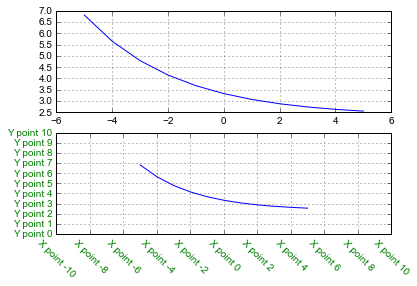

In [5]:
# Пример 8.3.1

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 6)
y = np.exp(-0.3*x) + 2.33

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, y)
ax1.grid(True)

ax2 = fig.add_subplot(212)
ax2.plot(x, y)
ax2.grid(True)

xticks = ax2.get_xticks()
yticks = ax2.get_yticks()

xx = np.arange(-10, 11, 2)
yy = np.arange(0, 11)

print('Xticks:', xticks)
print('Yticks:', yticks)

xlabels = []
ylabels = []
for i in xx:
    xlabels.append('X point %d' % i)

for j in yy:
    ylabels.append('Y point %d' % j)
    
ax2.set_xticks(xx)
ax2.set_yticks(yy)
ax2.set_yticklabels(ylabels, color='green')
ax2.set_xticklabels(xlabels, color='green', rotation=315)

yticklabels = ax2.get_yticklabels()
print('Yticklabels: %s' % type(yticklabels))
print('Каждый label - это %s' % (type(yticklabels[0])))

save('pic_8_3_1', fmt='png')
save('pic_8_3_1', fmt='pdf')

plt.show()

Для удобства пользователей многие методы настройки, требующие работы непосредственно с экземплярами Ticks, были продублированы в виде заскриптованных методов для объектов Axes. Далее показаны основные приёмы с помощью которых можно работать с координатными осями.

Для облегчения доступа к настройкам делений, требующим работы непосредственно с экземплярами Ticks, в matplotlib был сделан метод `ax.tick_params`, который позволяет быстро и просто настраивать расположение и отображение делений координатных осей и их подписей. Ниже приводится список атрибутов данного метода:

1. **axis** : ['x' | 'y' | 'both'] - экземпляр Axis на котором находятся деления; по умолчанию 'both';

2. **reset** : [True | False] - если True, то значения всех параметров сбрасываются на значения по умолчанию. По умолчанию равен False;

3. **which** : ['major' | 'minor' | 'both'] - определяет принадлежность к типу делений. По умолчанию 'major';

4. **direction** : ['in' | 'out' | 'inout'] - определяет направление делений (внутрь, вовне или и снаружи и внутри);

5. **length** - длиная деления в точках (points);

6. **width** - ширина деления в точках (points);

7. **color** - цвет деления. Возможен любой цвет, приемлимый в matplotlib;

8. **pad** - расстояние в точках между делением и подписью к нему;

9. **labelsize** - размер шрифта подписи деления в виде строки (например, 'large') или числа;

10. **labelcolor** - цвет подписи деления. Возможен любой цвет, приемлимый в matplotlib;

11. **colors** - изменяет цвет деления и цвет подписи деления на одно значение. Возможен любой цвет, приемлимый в matplotlib;

12. **zorder** - zorder деления и подписи деления;

13. **bottom, top, left, right** : [bool | 'on' | 'off'] - каждый из параметров контролирует отображение делений на соответствующей оси;

14. **labelbottom, labeltop, labelleft, labelright** : [bool | 'on' | 'off'] - каждый из параметров контролирует отображение подписи делений на соответствующей оси.

Правда метод tick_params не имеет параметра rotation. Чтобы повернуть подписи делений, нужно воспользоваться иным способом, например указать этот параметр явно через метод `ax.set_xticklabels`.

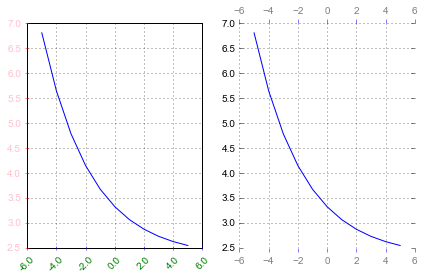

In [6]:
# Пример 8.3.2

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 6)
y = np.exp(-0.3*x) + 2.33

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(x, y)
ax1.grid(True)

# Настройка оси главных делений для оси абсцисс 
ax1.tick_params(axis='x', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='b', labelcolor='g',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
# Настройка оси главных делений для оси ординат 
ax1.tick_params(axis='y', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='pink',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)

# Метод tick_params не имеет параметра rotation. Поэтому чтобы повернуть подписи
# нужно сделать это явно через метод set_xticklabels
xticks = ax1.get_xticks()
ax1.set_xticklabels(xticks, rotation=45)

ax2 = fig.add_subplot(122, frameon=False)
ax2.plot(x, y)
ax2.grid(True)

ax2.tick_params(axis='x', which='major', direction='out',
                bottom=True, top=True, left=True, right=True, 
                color='blue', labelcolor='grey',
                labelbottom=True, labeltop=True, labelleft=True, labelright=True)
ax2.tick_params(axis='x', which='minor', direction='both',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='pink',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)

plt.tight_layout()

save('pic_8_3_2', fmt='png')
save('pic_8_3_2', fmt='pdf')

plt.show()

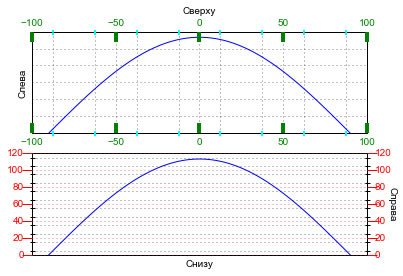

In [7]:
# Пример 8.3.3

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-90, 92.5 , 2.5)
y = 113.3*np.cos(x*np.pi/180.)
z = 113.3*np.sin(x*np.pi/180.)

fig = plt.figure()

ax = fig.add_subplot(211)
ax.plot(x, y)

ax.tick_params(axis='x', which='major', 
               labelleft='off', labelright='off', labeltop='on', labelbottom='on', 
               bottom=True, top=True,
               direction='in', length=10, width=4, colors='g')

old_major = ax.get_xticks()
N = 0.25
lag = (old_major[1] - old_major[0])*N
new_minor = np.arange(old_major[0] + lag, old_major[-1], 2*lag)
ax.set_xticks(new_minor, minor = True)

ax.tick_params(axis='x', which='minor', 
               labeltop='on', labelbottom='on', 
               bottom=True, top=True,
               direction='inout', length=5, width=2, colors='cyan')

ax.tick_params(axis='y', 
               labelleft='off', labelright='off',
               left=False, right=False)

ax.grid(True, which='major')
ax.grid(True, which='minor')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'Слева')
ax.xaxis.set_label_position('top')
ax.set_xlabel(u'Сверху')

# ************************************************
ax = fig.add_subplot(212)

ax.plot(x, y)
ax.tick_params(axis='both', reset=True)

ax.tick_params(axis='y', which='major', 
               labelleft='on', labelright='on', 
               left=True, right=True,
               direction='out', length=10, width=1., colors='r')

old_major = ax.get_yticks()
N = 0.25
lag = (old_major[1] - old_major[0])*N
new_minor = np.arange(old_major[0] + lag, old_major[-1], 2*lag)
ax.set_yticks(new_minor, minor = True)

ax.tick_params(axis='y', which='minor', 
               labelleft='on', labelright='on', 
               left=True, right=True,
               direction='inout', length=5, width=1., colors='k')

ax.tick_params(axis='x',
               labeltop='off', labelbottom='off', 
               bottom=False, top=False)

ax.yaxis.set_label_position('right')
ax.set_ylabel(u'Справа', rotation=270)

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'Снизу')

ax.grid(True, axis='y', which='major', color='red')
ax.grid(True, axis='y', which='minor', color='k')

save('pic_8_3_3', fmt='png')
save('pic_8_3_3', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

> + [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)